<h1><center>Projeto Final Big Data Science - Enem 2021</center></h1>

In [1]:
# Versão mais recente do seaborn para ter compatibilidade com os novos gráficos
!pip install seaborn==0.11.2

In [2]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Lendo a nossa base de dados do enem 2021
df_completo = pd.read_csv('MICRODADOS_ENEM_2021.csv', sep=';',  encoding='latin-1')

<h2><center>Análise Exploratória</center></h2>

In [4]:
df_completo.head(20)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B
5,210052391248,2021,10,F,1,3,1,1,9,1,...,A,A,A,A,A,A,B,A,A,B
6,210052615524,2021,9,F,0,3,1,1,6,1,...,B,A,A,B,B,A,C,A,A,B
7,210054368957,2021,4,F,1,1,1,1,1,1,...,B,A,A,C,B,A,D,B,B,B
8,210053417016,2021,8,F,1,3,1,2,0,2,...,B,A,A,B,A,A,B,A,A,B
9,210051128744,2021,4,F,1,3,1,2,0,2,...,B,A,B,C,B,A,C,A,A,B


In [5]:
df_completo.shape

(2685053, 76)

In [6]:
# Substituindo os dados de renda, cor/raça e sexo por valores reais inteligíveis
df_completo['Q006'] = df_completo['Q006'].map({'A':'Nenhuma renda', 'B':'Até 1.320', 'C':'Até 1.320',
                                 'D':'Até 3.520', 'E':'Até 3.520', 'F':'Até 3.520', 'G':'Até 3.520',
                                 'H':'Até 10.560','I':'Até 10.560', 'J':'Até 10.560','K':'Até 10.560',
                                 'L':'Até 10.560','M':'Até 10.560','N':'Até 10.560',
                                 'O':'Mais de 10.560','P':'Mais de 10.560','Q':'Mais de 10.560'})

df_completo['TP_COR_RACA'] = df_completo['TP_COR_RACA'].map({0:'Não declarado', 1:'Branca', 2:'Preta', 3:'Parda',
                                               4:'Amarela', 5:'Indígena', 6: 'Não dispõe da informação'})

df_completo['TP_SEXO'] = df_completo['TP_SEXO'].map({ 'M': 'Masculino', 'F': 'Feminino'})

In [7]:
# Selecionando as 8 variáveis que serão analisadas
enem_2021 = df_completo[['TP_SEXO', 'TP_COR_RACA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 
                         'NU_NOTA_REDACAO', 'Q006']]

enem_2021.shape

(2685053, 8)

In [8]:
pd.DataFrame({'tipos':enem_2021.dtypes, 'missing':enem_2021.isna().sum()})

,tipos,missing
TP_SEXO,object,0
TP_COR_RACA,object,0
NU_NOTA_CN,float64,744350
NU_NOTA_CH,float64,643280
NU_NOTA_LC,float64,643280
NU_NOTA_MT,float64,744350
NU_NOTA_REDACAO,float64,643280
Q006,object,1


In [9]:
enem_2021 = enem_2021.dropna(subset=['Q006'])

In [10]:
# Detectando valores nulos do dataset
pd.DataFrame({'tipos':enem_2021.dtypes, 'missing':enem_2021.isna().sum()})

,tipos,missing
TP_SEXO,object,0
TP_COR_RACA,object,0
NU_NOTA_CN,float64,744350
NU_NOTA_CH,float64,643280
NU_NOTA_LC,float64,643280
NU_NOTA_MT,float64,744350
NU_NOTA_REDACAO,float64,643280
Q006,object,0


In [11]:
# isolando valores nulos do dataset para analise
enem_2021_isnull = enem_2021[enem_2021.isnull().any(axis=1)]
enem_2021 = enem_2021.dropna()
enem_2021_isnull.shape

(750512, 8)

In [12]:
enem_2021_isnull.head()

,TP_SEXO,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006
0,Feminino,Branca,NaN,574.6,472.6,NaN,760.0,Até 3.520
2,Feminino,Branca,NaN,NaN,NaN,NaN,NaN,Até 1.320
5,Feminino,Parda,NaN,NaN,NaN,NaN,NaN,Até 1.320
6,Feminino,Parda,NaN,511.9,420.4,NaN,480.0,Até 1.320
7,Feminino,Branca,NaN,NaN,NaN,NaN,NaN,Até 3.520


In [13]:
pd.DataFrame({'tipos':enem_2021_isnull.dtypes, 'missing':enem_2021_isnull.isna().sum()})

,tipos,missing
TP_SEXO,object,0
TP_COR_RACA,object,0
NU_NOTA_CN,float64,744350
NU_NOTA_CH,float64,643280
NU_NOTA_LC,float64,643280
NU_NOTA_MT,float64,744350
NU_NOTA_REDACAO,float64,643280
Q006,object,0


<h1><center>Levantamento do requisitos a serem respondidos<center/></h1>

<h4>1) Cor e renda possuem alguma correlação?</h4>
<h4>2) Qual a relação da renda e cor para os alunos que não concluíram a prova ?</h4>
<h4>3) As maiores notas pertencem a que classe de renda ?</h4>
<h4>4) As menores notas pertencem a que classe de renda ?</h4>
<h4>5) As maiores notas pertencem a que classe de cor ?</h4>
<h4>6) As menores notas pertencem a que classe de cor ?</h4>
<h4>7) Qual a relação de homens e mulheres que se inscreveram na prova e que desistiram ? A porcentagem de desistência em relação a inscrição é maior em qual sexo ?</h4>

Obs.: 
- Foi levado em consideração alunos que possuisem alguma das notas finais como nulo como se não estivesse comparecido a prova ou desistido.

<h3>1) Cor e renda possuem alguma correlação?</h3>

A maioria dos alunos que concluiram a prova estão nos grupo de raça/cor brancos e pardos, e consequentemente a quantidade de registros com maior renda está concentrada mais nesses duas classes.

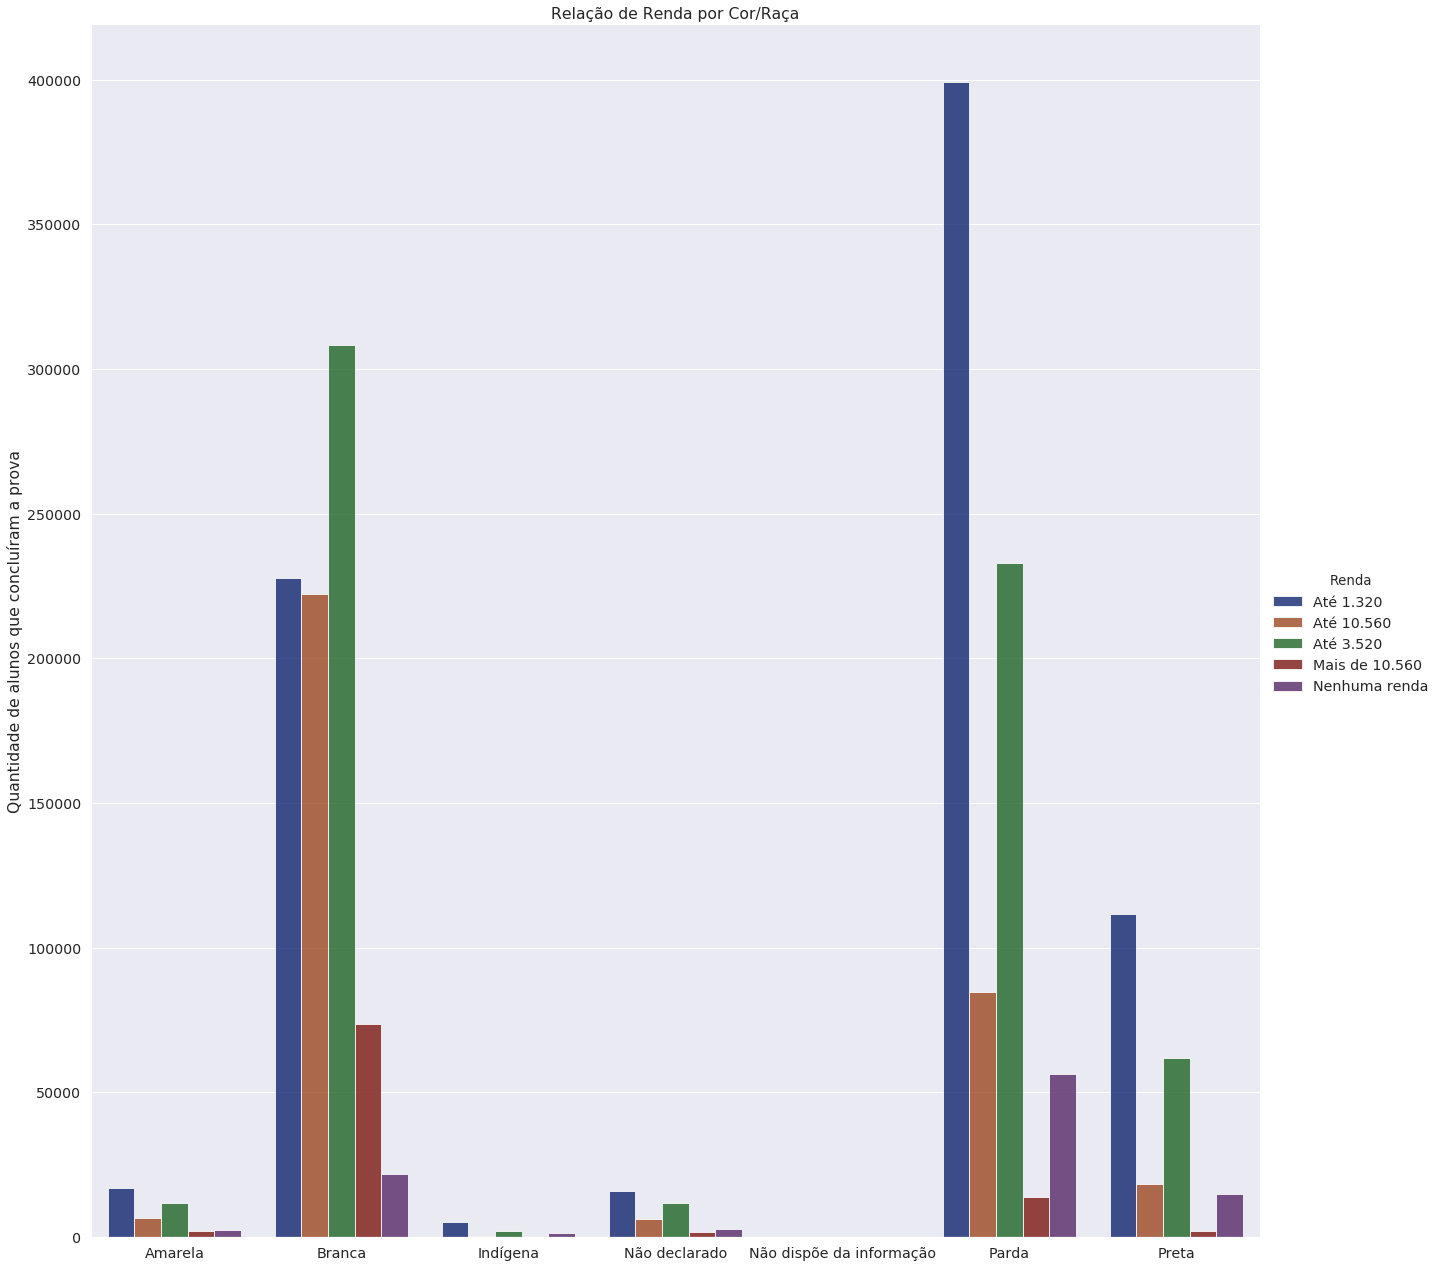

In [15]:
df_agrupado_cor_enem_2021 = enem_2021[['TP_COR_RACA', 'Q006']].groupby(['TP_COR_RACA', 'Q006']).size().reset_index(name='COUNTS')

sns.set_theme(style="ticks")
sns.set(font_scale=1.3)

g = sns.catplot(
    data=df_agrupado_cor_enem_2021, kind="bar",
    x="TP_COR_RACA", y="COUNTS", hue="Q006",
    ci="sd", palette="dark", alpha=.8, height=18
)

g.set_axis_labels("", "Quantidade de alunos que concluíram a prova")
g.legend.set_title("Renda")
g.set(title = "Relação de Renda por Cor/Raça")

<h3> 2) Qual a relação da renda e cor para os alunos que não concluíram a prova ? </h3>

A redução de alunos autodeclarados brancos entre os alunos que não conseguiram de alguma forma concluir a prova foi grande, e o aumento em ambas as cores/raças de renda "Até R$ 1.320,00" comprova a desiqualdade que familias de renda alta e baixa possuem na hora de concluir a prova, mostrando tambem que pessoas autodeclaradas brancas, por mais que seja um número expressivo na amostra como um todo, teve um redução entre os números de desistentes.

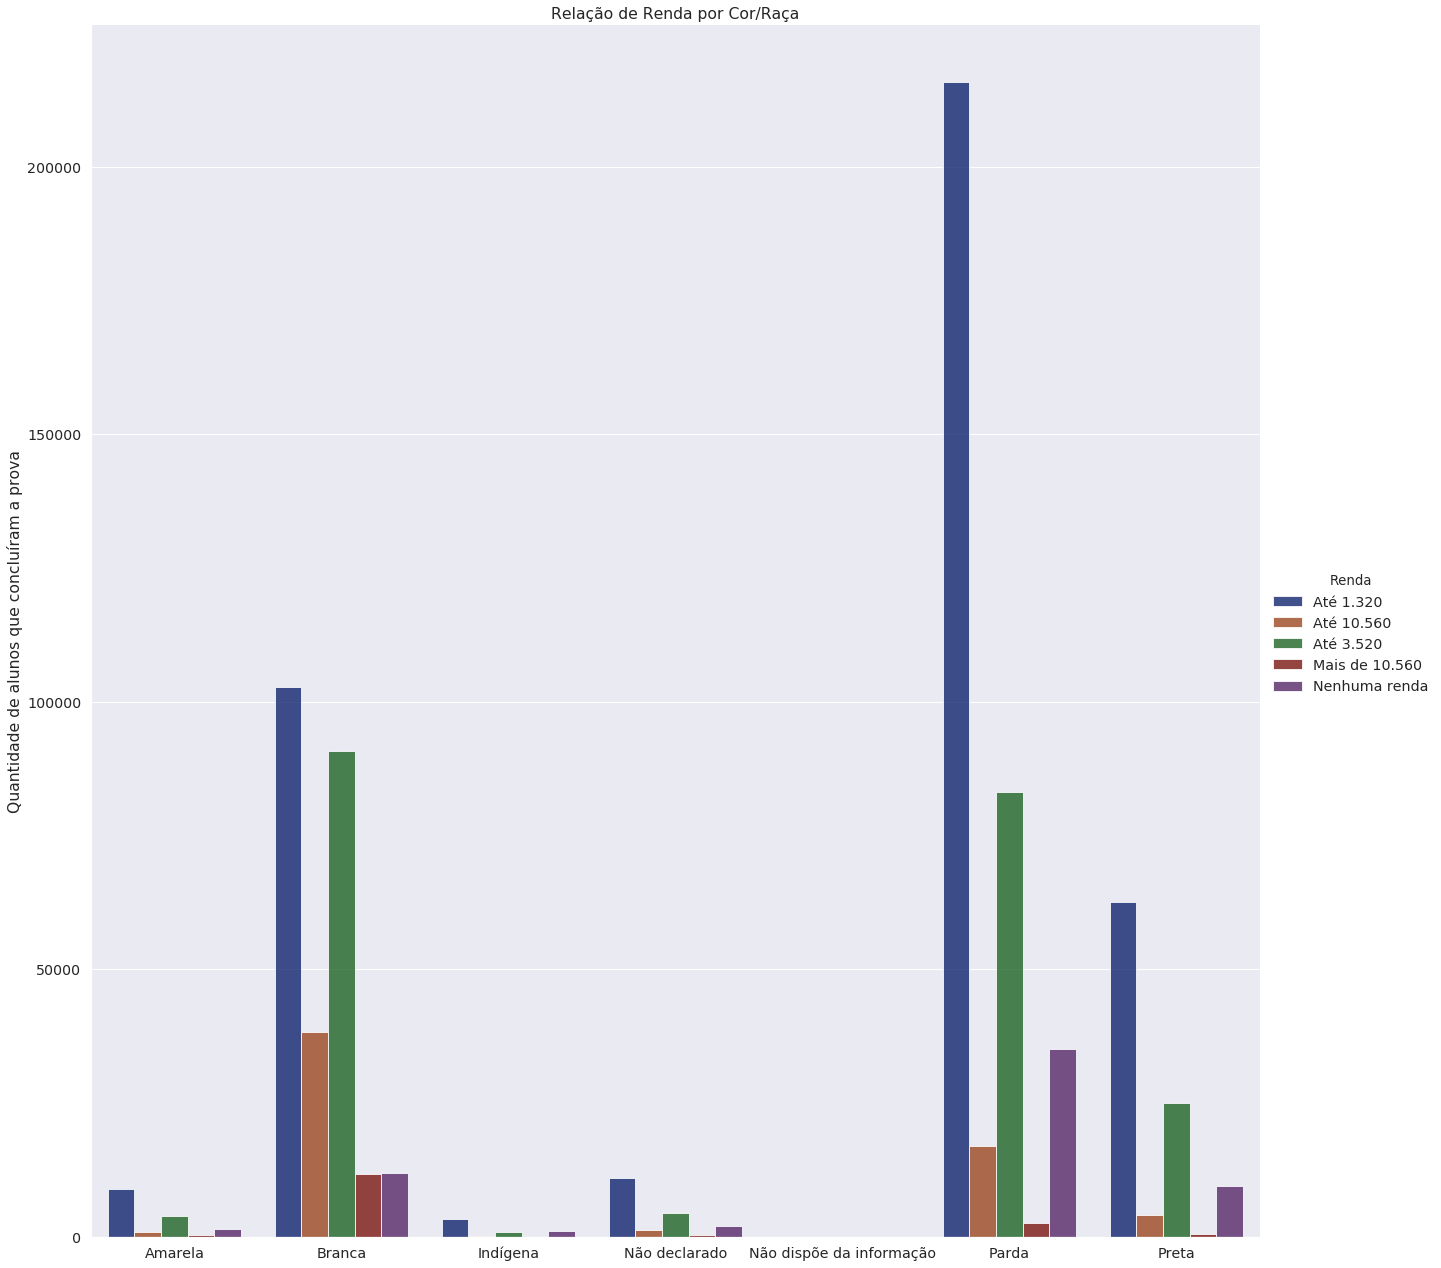

In [16]:
df_agrupado_cor_enem_2021_isnull = enem_2021_isnull[['TP_COR_RACA', 'Q006']].groupby(['TP_COR_RACA', 'Q006']).size().reset_index(name='COUNTS')

sns.set_theme(style="ticks")
sns.set(font_scale=1.3)

g = sns.catplot(
    data=df_agrupado_cor_enem_2021_isnull, kind="bar",
    x="TP_COR_RACA", y="COUNTS", hue="Q006",
    ci="sd", palette="dark", alpha=.8, height=18
)

g.set_axis_labels("", "Quantidade de alunos que concluíram a prova")
g.legend.set_title("Renda")
g.set(title = "Relação de Renda por Cor/Raça")

<h3>3) As maiores notas pertencem a que classe de renda ?</h3>

As maiores notas estão entre as duas classes de rendas mais altas, "Até R$ 10,560,00" e "Mais de R$ 10,560,00".

<h3>4) As menores notas pertencem a que classe de renda ?</h3>

As menos notas estão entre as duas classes de rendas mais baixas, "Nenhuma renda" e "Até R$ 1.320,00".

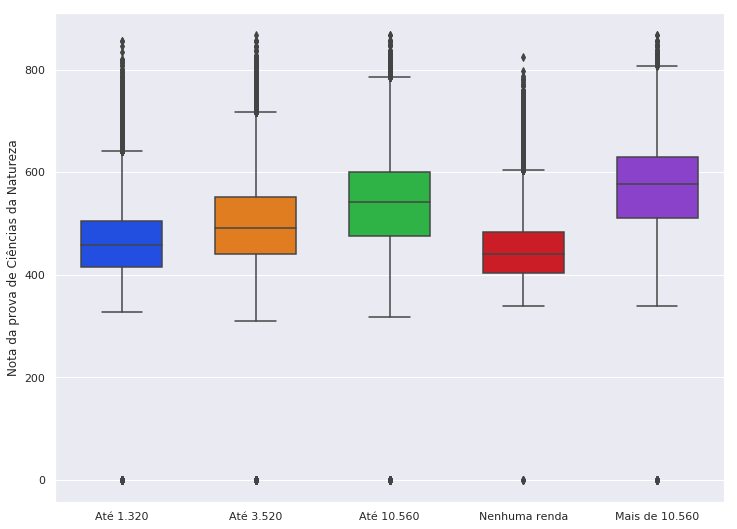

In [18]:
sns.set(rc={'figure.figsize':(12,9)})
sns.boxplot(x=enem_2021['Q006'], y=enem_2021['NU_NOTA_CN'], width=0.6, palette="bright")
plt.xlabel("")
plt.ylabel("Nota da prova de Ciências da Natureza")
plt.show()

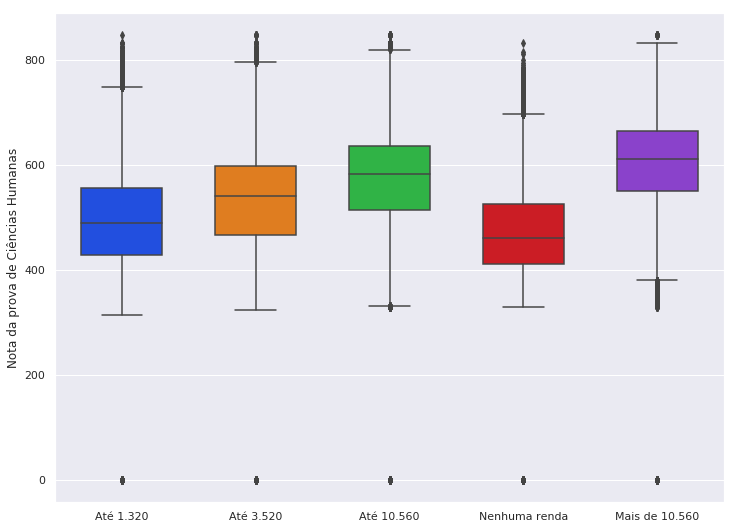

In [19]:
sns.set(rc={'figure.figsize':(12,9)})
sns.boxplot(x=enem_2021['Q006'], y=enem_2021['NU_NOTA_CH'], width=0.6, palette="bright")
plt.xlabel("")
plt.ylabel("Nota da prova de Ciências Humanas")
plt.show()

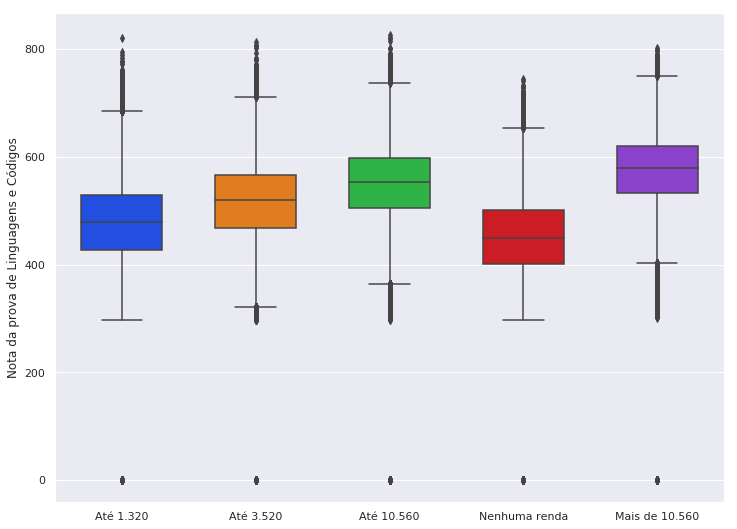

In [20]:
sns.set(rc={'figure.figsize':(12,9)})
sns.boxplot(x=enem_2021['Q006'], y=enem_2021['NU_NOTA_LC'], width=0.6, palette="bright")
plt.xlabel("")
plt.ylabel("Nota da prova de Linguagens e Códigos")
plt.show()

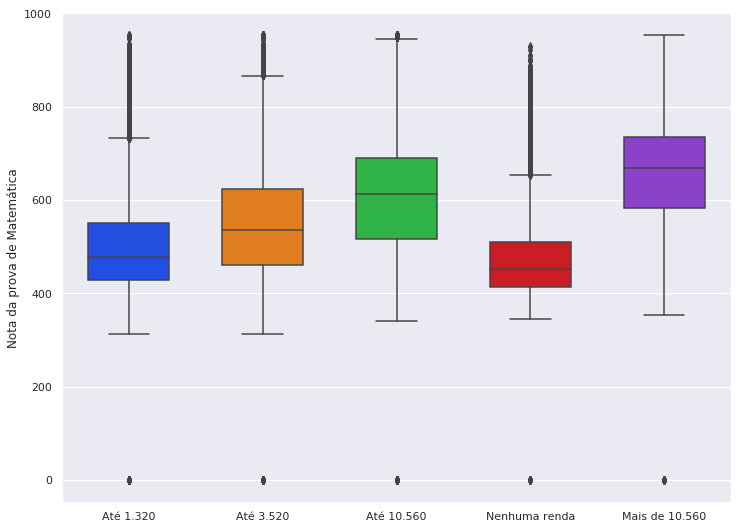

In [21]:
sns.set(rc={'figure.figsize':(12,9)})
sns.boxplot(x=enem_2021['Q006'], y=enem_2021['NU_NOTA_MT'], width=0.6, palette="bright")
plt.xlabel("")
plt.ylabel("Nota da prova de Matemática")
plt.show()

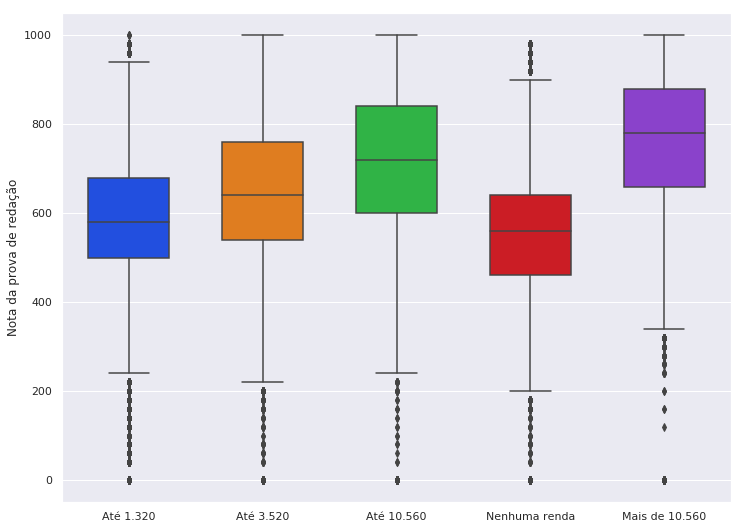

In [22]:
sns.set(rc={'figure.figsize':(12,9)})
sns.boxplot(x=enem_2021['Q006'], y=enem_2021['NU_NOTA_REDACAO'], width=0.6, palette="bright")
plt.xlabel("")
plt.ylabel("Nota da prova de redação")
plt.show()

<h3>5) As maiores notas pertencem a que classe de cor ?</h3>

As maiores notas estão entre as classes de raça/cor "Branca" e "Amarela", desconsiderando os não declarados.

<h3>6) As menores notas pertencem a que classe de cor ?</h3>

As menores notas estão entre as classes de raça/cor "Indígena" e "Preto", desconsiderando os não declarados.

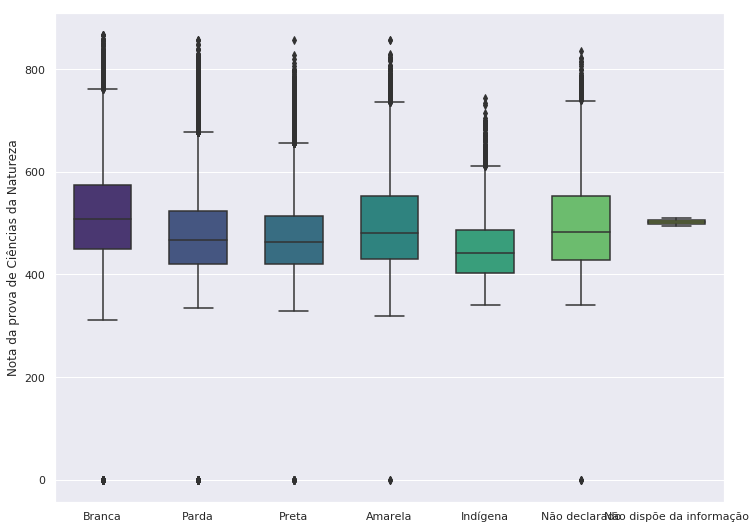

In [29]:
sns.set(rc={'figure.figsize':(12,9)})
sns.boxplot(x=enem_2021['TP_COR_RACA'], y=enem_2021['NU_NOTA_CN'], width=0.6, palette="viridis")
plt.xlabel("")
plt.ylabel("Nota da prova de Ciências da Natureza")
plt.show()

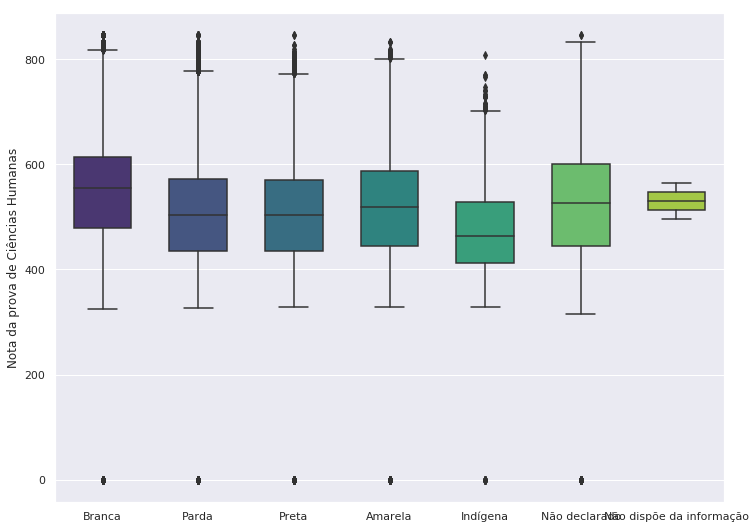

In [30]:
sns.set(rc={'figure.figsize':(12,9)})
sns.boxplot(x=enem_2021['TP_COR_RACA'], y=enem_2021['NU_NOTA_CH'], width=0.6, palette="viridis")
plt.xlabel("")
plt.ylabel("Nota da prova de Ciências Humanas")
plt.show()

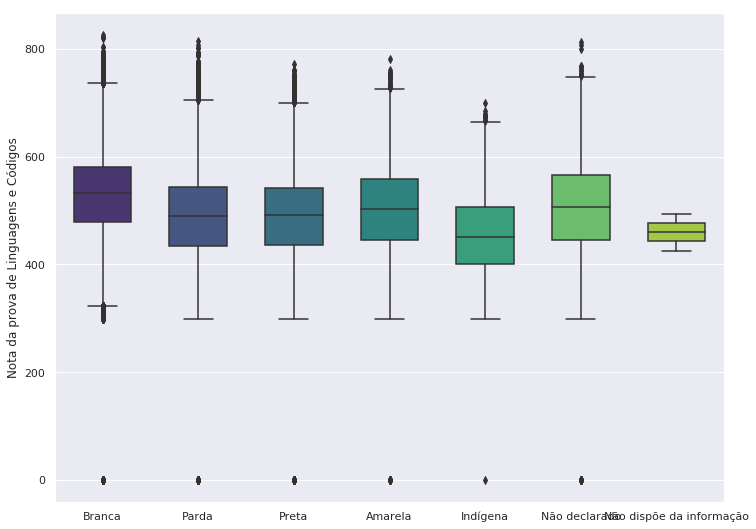

In [31]:
sns.set(rc={'figure.figsize':(12,9)})
sns.boxplot(x=enem_2021['TP_COR_RACA'], y=enem_2021['NU_NOTA_LC'], width=0.6, palette="viridis")
plt.xlabel("")
plt.ylabel("Nota da prova de Linguagens e Códigos")
plt.show()

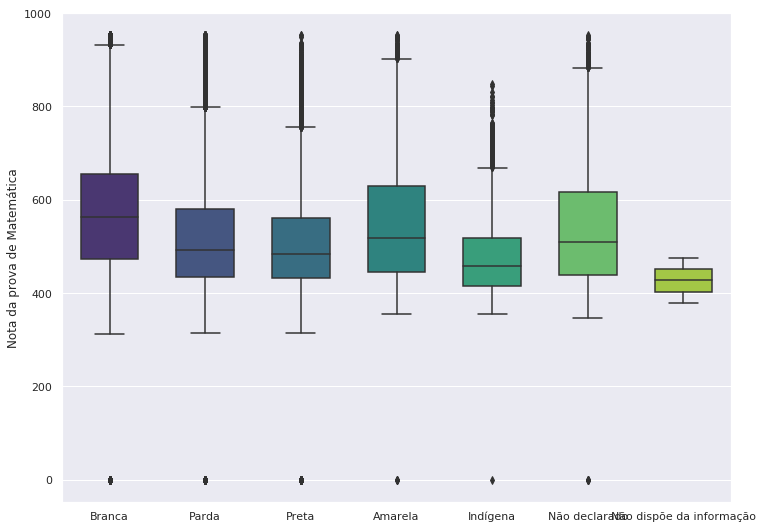

In [32]:
sns.set(rc={'figure.figsize':(12,9)})
sns.boxplot(x=enem_2021['TP_COR_RACA'], y=enem_2021['NU_NOTA_MT'], width=0.6, palette="viridis")
plt.xlabel("")
plt.ylabel("Nota da prova de Matemática")
plt.show()

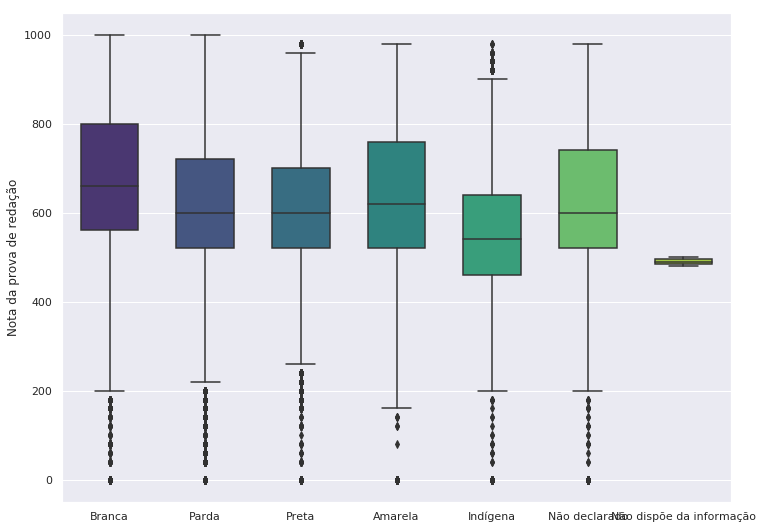

In [33]:
sns.set(rc={'figure.figsize':(12,9)})
sns.boxplot(x=enem_2021['TP_COR_RACA'], y=enem_2021['NU_NOTA_REDACAO'], width=0.6, palette="viridis")
plt.xlabel("")
plt.ylabel("Nota da prova de redação")
plt.show()

<h3>7) Qual a relação de homens e mulheres que se inscreveram na prova e que desistiram ? A porcentagem de desistência em relação a inscrição é maior em qual sexo ?</h3>

Tiveram um número bem maior de inscrições do sexo feminino, porem a taxa de desistencia entre os sexos foi maior no sexo masculino.

In [34]:
df_agrupado_sexo_enem_2021 = df_completo[['TP_SEXO']].groupby(['TP_SEXO']).size().reset_index(name='COUNTS')
df_agrupado_sexo_enem_2021_isnull = enem_2021_isnull[['TP_SEXO']].groupby(['TP_SEXO']).size().reset_index(name='COUNTS')

total_sexo_masculino_inscritos = df_agrupado_sexo_enem_2021['COUNTS'][1]
total_sexo_feminino_inscritos = df_agrupado_sexo_enem_2021['COUNTS'][0]
total_sexo_masculino_desistiram = df_agrupado_sexo_enem_2021_isnull['COUNTS'][1]
total_sexo_feminino_desistiram = df_agrupado_sexo_enem_2021_isnull['COUNTS'][0]

print(total_sexo_masculino_inscritos, total_sexo_feminino_inscritos, total_sexo_masculino_desistiram, total_sexo_feminino_desistiram)

998995 1686058 280027 470485


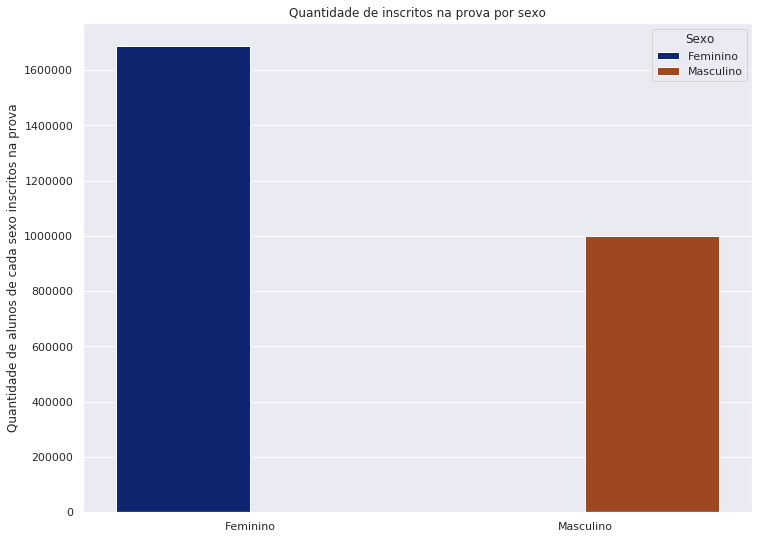

In [39]:
ax = sns.barplot(x="TP_SEXO", y="COUNTS", hue="TP_SEXO", data=df_agrupado_sexo_enem_2021, palette="dark").set(
    xlabel='', ylabel='Quantidade de alunos de cada sexo inscritos na prova', 
    title='Quantidade de inscritos na prova por sexo')

plt.legend(title = "Sexo")

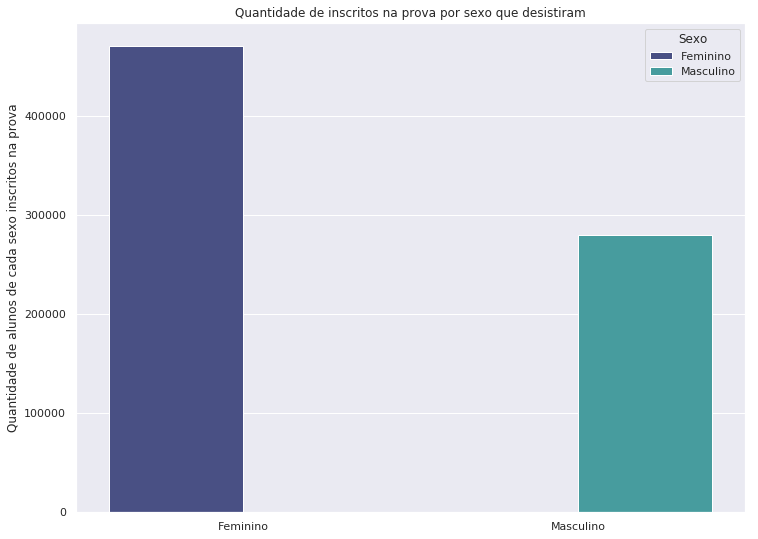

In [43]:
ax = sns.barplot(x="TP_SEXO", y="COUNTS", hue="TP_SEXO", data=df_agrupado_sexo_enem_2021_isnull, palette="mako").set(
    xlabel='', ylabel='Quantidade de alunos de cada sexo inscritos na prova', 
    title='Quantidade de inscritos na prova por sexo que desistiram')

plt.legend(title = "Sexo")

In [44]:
porcentagem_desistencia_masculino = (total_sexo_masculino_desistiram * 100) / total_sexo_masculino_inscritos
porcentagem_desistencia_feminino = (total_sexo_feminino_desistiram * 100) / total_sexo_feminino_inscritos

print("Porcentagem de desistentes no sexo masculino: %.2f%%" % porcentagem_desistencia_masculino)
print("Porcentagem de desistentes no sexo feminino: %.2f%%" % porcentagem_desistencia_feminino)

Porcentagem de desistentes no sexo masculino: 28.03%
Porcentagem de desistentes no sexo feminino: 27.90%
